In [13]:
!pip install ultralytics --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 16.4 MB/s eta 0:00:00


In [14]:
from ultralytics import YOLO
import torch
import cv2
import os
from matplotlib import pyplot as plt


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [15]:
# Check device
device = "GPU" if torch.cuda.is_available() else "CPU"
print(f"Using device: {device}")

# Load pre-trained YOLOv8 model
model = YOLO('yolov8n.pt')

# Download and read image
image_url = "https://4kwallpapers.com/images/wallpapers/katseye-members-3840x2160-18490.jpeg"
os.system(f"wget -q \"{image_url}\" -O input.jpg")

if not os.path.exists("input.jpg"):
    raise FileNotFoundError("Image not downloaded. Check URL.")

img = cv2.imread("input.jpg")
if img is None:
    raise ValueError("Could not load image. Possibly wrong format or filename.")

h, w, _ = img.shape
print(f"Image loaded: {w}×{h}")


Using device: CPU
Image loaded: 3840×2160


In [18]:
results = model("input.jpg", show=False)
results[0].save(filename="detected.jpg")


image 1/1 /content/input.jpg: 384x640 7 persons, 347.2ms
Speed: 11.7ms preprocess, 347.2ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


'detected.jpg'

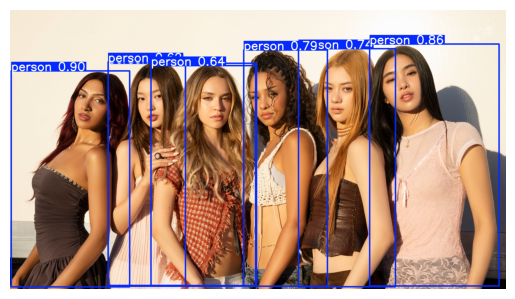

In [19]:
# Display result
detected_img = cv2.imread("detected.jpg")
detected_img = cv2.cvtColor(detected_img, cv2.COLOR_BGR2RGB)
plt.imshow(detected_img)
plt.axis("off")
plt.show()